## Instructions
0. If you haven't already, follow [the setup instructions here](https://jennselby.github.io/MachineLearningCourseNotes/#setting-up-python3) to get all necessary software installed.
0. Read through the code in the following sections:
    * [First Model](#First-Model)
    * [Create Images](#Create-Images)
    * [Run Images Through Model](#Run-Images-Through-Model)
0. Answer the [Model 1 Questions](#Model-1-Questions)
0. Read through the code for the [Second Model](#Second-Model)
0. Complete [Exercise #1](#Exercise-#1)
0. Optionally, complete [Exercise #2](#Exercise-#2)

First, we'll want to import the keras modules we'll be using for our neural network and the numpy and matplotlib modules that we'll be using for displaying our test images.

In [1189]:
from keras.models import Sequential
from keras.layers import Conv2D
import numpy
from matplotlib.pyplot import imshow
# tell matplotlib to display images within this notebook
%matplotlib inline 

## First Model

Next, let's set up the structure of our model. We'll start with a really simple model, with just one convolutional layer that has just one filter. We are going to be using 9x9-pixel grayscale images, so we set the input shape accordingly. If we were using color images with red-green-blue channels, the last dimension would be size three (one for each color) instead of one.

In [1190]:
kernel_size = 3
image_size = 9

In [1191]:
model0 = Sequential()
model0.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=1,
                  input_shape=(image_size, image_size, 1)))

Normally at this point, we would compile and train (aka fit) our model, but instead we're going to set the weights manually and then see the output we get on some test images.

First, let's take a look at what the randomly generated weights look like, to understand the format that we'll need to use to set the new weights. By changing the parameters of the model above and looking at how it affects the weight structure, we can understand what each weight is connected to (try it!).

In [1192]:
weights = model0.get_weights()
weights

[array([[[[ 0.4287206 ]],
 
         [[-0.31481287]],
 
         [[-0.54419106]]],
 
 
        [[[-0.38269436]],
 
         [[-0.40608734]],
 
         [[ 0.05317956]]],
 
 
        [[[-0.05440682]],
 
         [[-0.11360189]],
 
         [[ 0.19520813]]]], dtype=float32),
 array([0.], dtype=float32)]

Now, we change the weights so that the filter will capture a certain pattern. We'll explore more about what this means below, but feel free to start generating some guesses.

In [1193]:
layer_num = 0
filter_num = 0
y = 0
for x in range(kernel_size):
    weights[layer_num][y][x][0][filter_num] = 1
for y in range(1,kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = -1
weights

[array([[[[ 1.]],
 
         [[ 1.]],
 
         [[ 1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]],
 
 
        [[[-1.]],
 
         [[-1.]],
 
         [[-1.]]]], dtype=float32),
 array([0.], dtype=float32)]

And save those weights back into the model.

In [1194]:
model0.set_weights(weights)

## Create Images

Now, let's create some 9x9 images that we will run through our model.

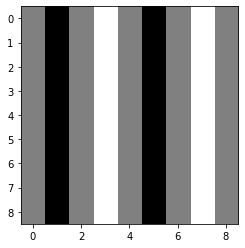

In [1195]:
image0 = numpy.array([
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
    [128, 0, 128, 255, 128, 0, 128, 255, 128],
], dtype=numpy.uint8)
imshow(image0, cmap='gray')

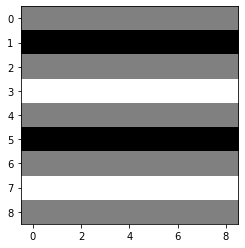

In [1196]:
image1 = numpy.array([
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
    [255, 255, 255, 255, 255, 255, 255, 255, 255],
    [128, 128, 128, 128, 128, 128, 128, 128, 128],
], dtype=numpy.uint8)
imshow(image1, cmap='gray')

## Run Images Through Model

The images need to be in a slightly different format for Keras than they do for the imshow command. Right now, they are 9x9 arrays, and we need them to be 9x9x1 -- three dimensional instead of two.

In [1197]:
images = []
for image in [image0, image1]: # You may find it easier to take one of these out, to look at them one at a time
    images.append(numpy.resize(image, (image_size, image_size, 1)))

And now we give these images to our model and take a look at what the filter has found. 

In [1198]:
model0.predict(numpy.array(images))

array([[[[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]],

        [[ -256.],
         [ -383.],
         [ -511.],
         [ -383.],
         [ -256.],
         [ -383.],
         [ -511.]]],


       [[[    0.],
         [    0.],
         [    0

## Model 1 Questions

### Answer these before going on to the second model!

1. There are a lot of numbers in the output above: 2 arrays of 7 arrays of 7 arrays of a single element. Why are they in groups of seven?
    1. Since our kernel is 3 by 3, it cannot be applied to the edges of the 9 by 9 images (as the kernel simply does not fit). Instead, we can only apply the kernel to the interior 7 by 7 square. Thus, we get 2 arrays (corresponding to the two images) of 7 by 7 arrays (corresponding to the sites where the kernel is applied).

2. When we created the model, we asked it to have one filter. In which image do we get the highest absolute values in the filter outputs? How does this relate to the pattern of weights that was set?
    1. The terms with the highest norm come from the second image. This is because the kernel we have yields large negative values when we have horizontal lines with high intensity values as long as the upper line of the kernel has small intensity values. Applying the kernel centered on the third row (index 2) of the second image in particular yields large negative values because the first row has intensity 0 while the other two rows have rather high intensities.

## Second Model

Let's move to a slightly more complex model. Now, there are two convolutional layers, the first with two filters and the second with one filter. One other difference is that we're going to be taking strides so that we only examine each pixel once, instead of looking at overlapping groups. This makes it a little simpler to understand the manual weights.

In [1199]:
model1 = Sequential()
model1.add(Conv2D(filters=2,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(9, 9, 1)))
model1.add(Conv2D(filters=1, kernel_size=kernel_size))

With a different model structure, we will have a different number of weights to fit.

In [1200]:
weights = model1.get_weights()

As before, we manually set the weights to match some specific patterns.

In [1201]:
layer_num = 0
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][0][filter_num] = 1
        else:
            weights[layer_num][y][x][0][filter_num] = -1

In [1202]:
# layer 1 is for setting the biases of the first layer.
# They are zero by default, so leave them that way and
# move on to layer 2, which contains the weights for the
# filters of the second layer.
layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25
        input_filter_num = 1
        if kernel_size - 1 - y == x:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.25

And save the weights back into the model.

In [1203]:
model1.set_weights(weights)

Again, run our test images through the model to see what the filters output.

In [1204]:
def predict_images(images, model):
    resized_images = []
    for image in images:
        resized_images.append(numpy.resize(image, model.input_shape[1:]))
    return model.predict(numpy.array(resized_images))

In [1205]:
predict_images([image0, image1], model1)

array([[[[-1150.]]],


       [[[-1150.]]]], dtype=float32)

## Exercise #1

Note above that neither image0 nor image1 gets a positive output. Create some images that do get positive ouputs from this model. The code below might help you get started.

In [1206]:
class linear_conv_optimizer:
    def __init__(self, conv_model):
        """
            The convolutional neutal network here must have one numerical output at the end for this class
            to function properly
        """
        self.conv_model=conv_model
        self.sranges=[range(n) for n in self.conv_model.input_shape[1:3]]  #First value is vertical, then horizontal
        self.valuation_grid=None
        self.positive_optimized=None
        self.negative_optimized=None
        
        self.pixel_valuations()
        self.positive_optim()
        self.negative_optim()
        
    def single_pixel(self,i,j):
        grid=numpy.zeros(self.conv_model.input_shape[1:3])
        grid[i,j]=1
        return grid
    
    def pixel_valuations(self):
        """
            Abusing the fact the model is completely linear, we can get optimized images just by evaluating
            all possible images with a single 1, and seeing which of those have positive (or negative)
            impacts on the final values
        """
        grid=numpy.zeros(self.conv_model.input_shape[1:3])
        for i in self.sranges[0]:
            for j in self.sranges[1]:
                grid[i,j]=predict_images([self.single_pixel(i,j)], self.conv_model)[0,0,0,0]
            
        self.valuation_grid=grid
        
    def positive_optim(self):
        """
            For a positively optimized image, we want a 255 in all spots with positive contribution
            Setting 0 values to 127.5 just provides better symmetry with the negatively optimized case
        """
        positive_to_255=numpy.vectorize(lambda x: 255 if x>0 else (127.5 if x==0 else 0))
        self.positive_optimized=positive_to_255(self.valuation_grid)
        
    def negative_optim(self):
        """
            Same as above, but negative
        """
        negative_to_255=numpy.vectorize(lambda x: 255 if x<0 else (127.5 if x==0 else 0))
        self.negative_optimized=negative_to_255(self.valuation_grid)
        
    def display_optimized(self, pm):
        """
            For some reason, you can't seem to display both images simultaneously, so I'm choosing to split them.
        """
        print(predict_images([self.positive_optimized, self.negative_optimized], self.conv_model))
        if pm==1:
            print("Positive Optimized:")
            imshow(self.positive_optimized, cmap='gray', vmin=0, vmax=255)
        elif pm==-1:
            print("Negative Optimized:")
            imshow(self.negative_optimized, cmap='gray', vmin=0, vmax=255)
        else:
            raise ValueError("Argument should be ±1")
            
    
    def display_valuation(self):
        """
            The way the fit_to_255 function is defined here means the mapping is assymetric for positive
            and negative values. However, it does mean that negative values get blue colors and positive
            ones get red colors, so the assymetry is worth it.
        """
        a=self.valuation_grid.min()
        b=self.valuation_grid.max()
        
        fit_to_255=numpy.vectorize(lambda x: 127.5/b*x+127.5 if x>=0 else 127.5-127.5/a*x)
        
        grid=fit_to_255(self.valuation_grid)
        imshow(grid, cmap='bwr', vmin=0, vmax=255)
        

In [1207]:
optim=linear_conv_optimizer(model1)

[[[[ 5865.]]]


 [[[-8160.]]]]
Positive Optimized:


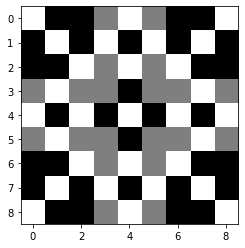

In [1208]:
optim.display_optimized(1)

[[[[ 5865.]]]


 [[[-8160.]]]]
Negative Optimized:


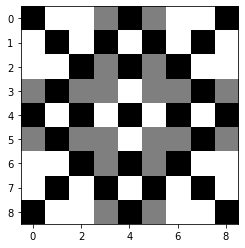

In [1209]:
optim.display_optimized(-1)

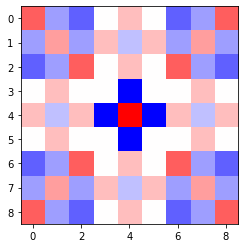

In [1210]:
optim.display_valuation()

As you can see, the positively optimized and negatively optimized cases are just mirror images of one another, with the function 255-x mapping any pixel in one to its value in the other (this really only works because I arbitrarily set the 0 values to have itensity 127.5=255/2, but it makes the symmetry clearer so I think that's fine). This symmetry makes perfect sense, as when we want to postively optimize we jut ignore negative coefficient pixels, while the opposite happens when we negatively optimize.

## Exercise #2

### Optional

Add additional filters to the model or create a new model with your own filters. Create images that get positive weights for different patterns of filters.


## Chaos Model:

In [1211]:
chaos = Sequential()
chaos.add(Conv2D(filters=2,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(27, 27, 1)))
chaos.add(Conv2D(filters=1, kernel_size=kernel_size, strides=(3,3)))
chaos.add(Conv2D(filters=1, kernel_size=kernel_size))

weights = chaos.get_weights()

In [1212]:
layer_num = 0
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = numpy.random.uniform(-2,2)

filter_num = 1
for y in range(kernel_size):
    for x in range(kernel_size):
        weights[layer_num][y][x][0][filter_num] = numpy.random.triangular(-1.5,0,1.5)
            

layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        input_filter_num = 0
        if y + x == 2:
            weights[layer_num][y][x][input_filter_num][filter_num] = -0.3+numpy.random.uniform(-1,1)
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = 0.2
        input_filter_num = 1
        if x+y==1:
            weights[layer_num][y][x][input_filter_num][filter_num] = -1
        else:
            weights[layer_num][y][x][input_filter_num][filter_num] = 1
            
layer_num = 4
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if (x+y)%2==0:
            weights[layer_num][y][x][0][filter_num] = numpy.random.uniform(-0.5,0.5)
        else:
            weights[layer_num][y][x][0][filter_num] = numpy.random.uniform(-2,1)

            
chaos.set_weights(weights)

In [1213]:
optim_chaos=linear_conv_optimizer(chaos)

[[[[ 24968.19 ]]]


 [[[-25766.088]]]]
Positive Optimized:


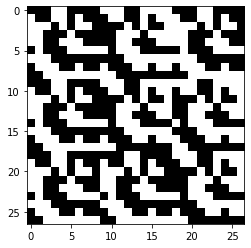

In [1214]:
optim_chaos.display_optimized(1)

[[[[ 24968.19 ]]]


 [[[-25766.088]]]]
Negative Optimized:


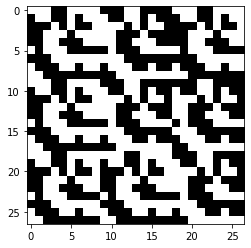

In [1215]:
optim_chaos.display_optimized(-1)

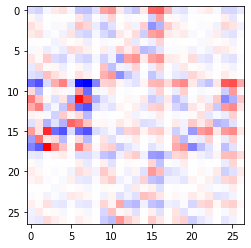

In [1216]:
optim_chaos.display_valuation()

## Simple Model:

In [1217]:
simple = Sequential()
simple.add(Conv2D(filters=1,
                  kernel_size=kernel_size,
                  strides=(3,3),
                  input_shape=(27, 27, 1)))
simple.add(Conv2D(filters=1, kernel_size=kernel_size, strides=(3,3)))
simple.add(Conv2D(filters=1, kernel_size=kernel_size))

weights = simple.get_weights()

In [1218]:
layer_num = 0
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if (x+y)%3==0:
            weights[layer_num][y][x][0][filter_num] = 1
        elif (x+y)%3==1:
            weights[layer_num][y][x][0][filter_num] = -1
        else:
            weights[layer_num][y][x][0][filter_num] = 0
            

layer_num = 2
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if 2*x-y>=0:
            weights[layer_num][y][x][0][filter_num] = 0.5
        else:
            weights[layer_num][y][x][0][filter_num] = -0.3
            
layer_num = 4
filter_num = 0
for y in range(kernel_size):
    for x in range(kernel_size):
        if ((x**y)%(x+y+1))%2==0:
            weights[layer_num][y][x][0][filter_num] = -0.2
        else:
            weights[layer_num][y][x][0][filter_num] = 0.4
        
simple.set_weights(weights)

In [1219]:
optim_simple=linear_conv_optimizer(simple)

[[[[ 8154.8994]]]


 [[[-8154.8994]]]]
Positive Optimized:


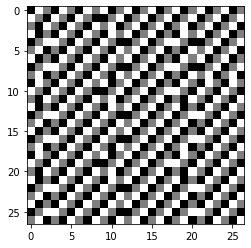

In [1220]:
optim_simple.display_optimized(1)

[[[[ 8154.8994]]]


 [[[-8154.8994]]]]
Negative Optimized:


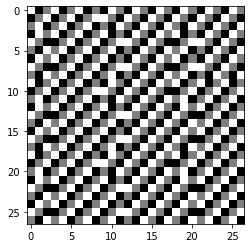

In [1221]:
optim_simple.display_optimized(-1)

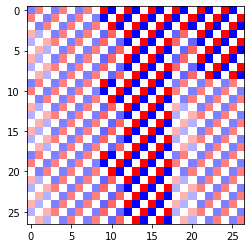

In [1222]:
optim_simple.display_valuation()